In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("galaxy.csv")

In [3]:
df.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,NaN,Space Gray,Galaxy_S8,contains description,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               316 non-null    object 
 3   color                 892 non-null    object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [5]:
df.describe()

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,0.449158,216.844162,31.184512,2.863300,0.461953
std,0.497576,172.893308,41.744518,9.418585,0.498718
min,0.000000,0.010000,0.000000,0.000000,0.000000
25%,0.000000,80.000000,0.000000,0.000000,0.000000
50%,0.000000,198.000000,0.000000,0.000000,0.000000
75%,1.000000,310.000000,79.000000,2.000000,1.000000
max,1.000000,999.000000,111.000000,81.000000,1.000000


In [6]:
import seaborn as sns

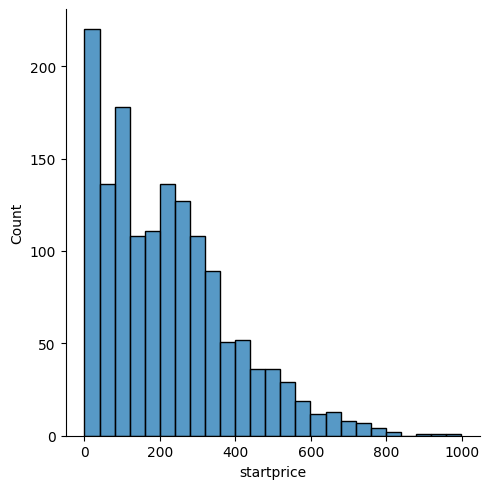

In [7]:
sns.displot(df["startprice"])

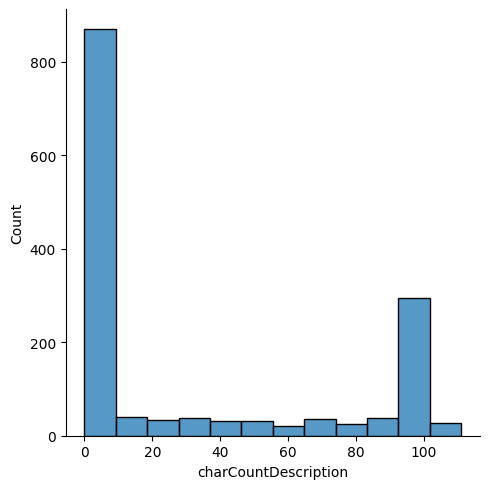

In [9]:
sns.displot(df["charCountDescription"])

<Axes: xlabel='productline', ylabel='startprice'>

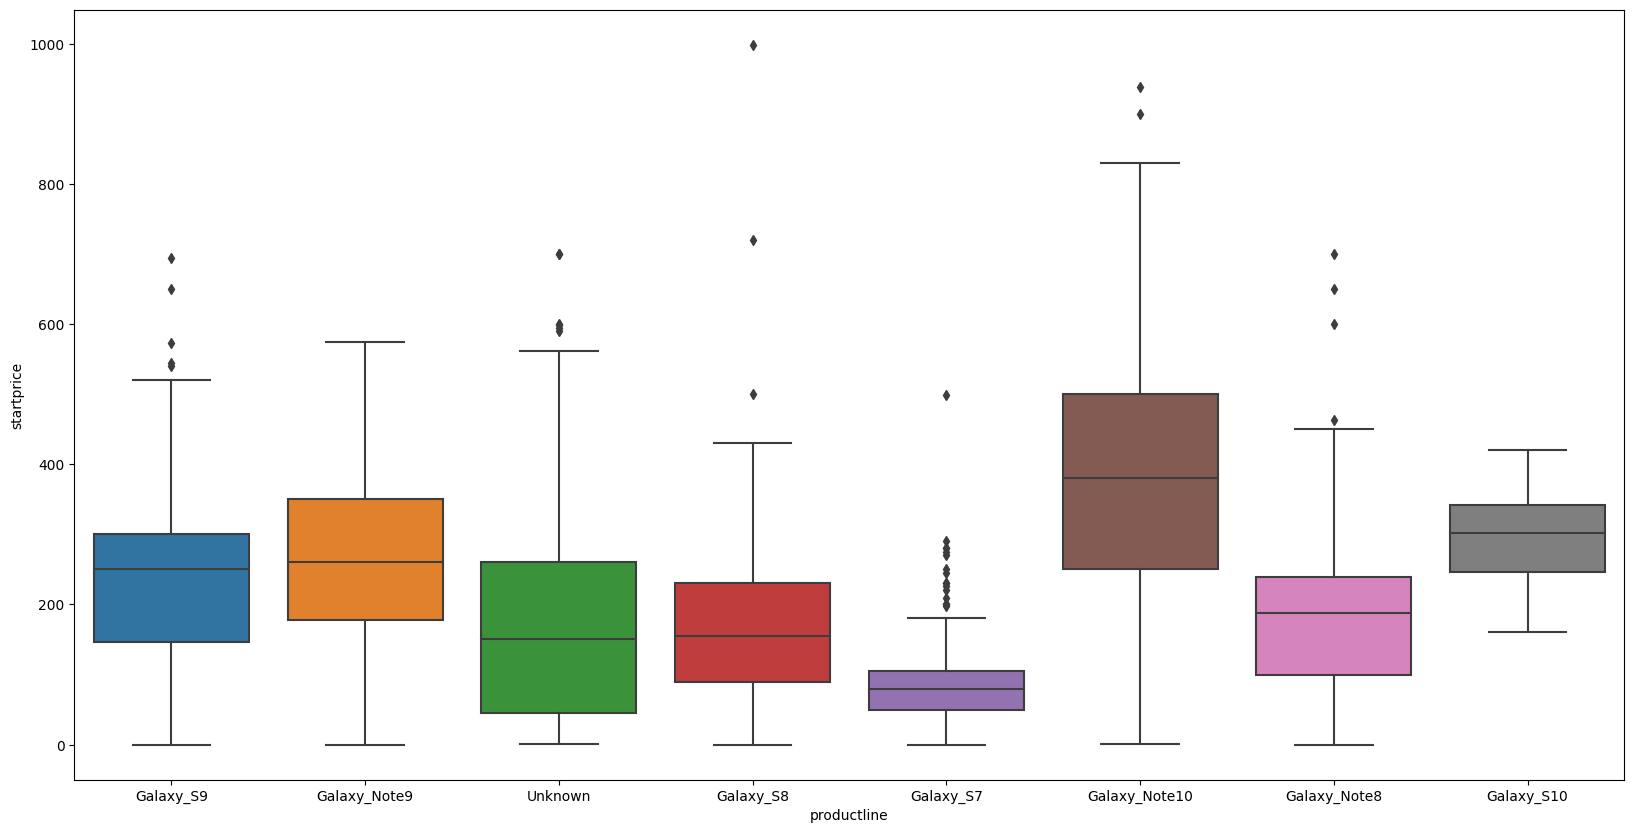

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
sns.boxplot(data=df, x="productline", y="startprice")

In [13]:
df.isna().sum()

BuyItNow                   0
startprice                 0
carrier                 1169
color                    593
productline                0
noDescription              0
charCountDescription       0
upperCaseDescription       0
sold                       0
dtype: int64

In [15]:
df = df.fillna("Unknown")

In [16]:
# 휴대폰은 종류별로 몇 개씩이나 올라왔을까?
df["productline"].value_counts()

productline
Galaxy_Note10    351
Galaxy_S8        277
Galaxy_S7        227
Unknown          204
Galaxy_S9        158
Galaxy_Note8     153
Galaxy_Note9     107
Galaxy_S10         8
Name: count, dtype: int64

In [17]:
df["color"].value_counts()

color
Unknown           593
White             328
Midnight Black    274
Space Gray        180
Gold               52
Black              38
Aura Black         19
Prism Black         1
Name: count, dtype: int64

In [18]:
# "*** black"은 모두 "black"으로 통일하기

def black_to_black(x):
    if x.endswith("Black"):
        return "Black"
    else:
        return x


df["color"] = df["color"].apply(black_to_black)

In [19]:
df["color"].value_counts()

color
Unknown       593
Black         332
White         328
Space Gray    180
Gold           52
Name: count, dtype: int64

In [20]:
# 카테고리데이터 one-hot Encoding
df = pd.get_dummies(df, columns=["carrier", "color", "productline", "noDescription"])

In [21]:
df.head()

,BuyItNow,startprice,charCountDescription,upperCaseDescription,sold,carrier_AT&T,carrier_Sprint/T-Mobile,carrier_Unknown,carrier_Verizon,color_Black,...,productline_Galaxy_Note10,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown,noDescription_contains description,noDescription_no description
0,0,199.99,0,0,1,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,235.00,0,0,0,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
2,0,199.99,100,2,0,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,True
3,1,175.00,0,0,1,True,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,1,100.00,0,0,1,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False


In [22]:
# 의사결정나무(스무고개)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [23]:
X = df.drop("sold", axis=1)
y = df["sold"]

In [25]:
X.head()

,BuyItNow,startprice,charCountDescription,upperCaseDescription,carrier_AT&T,carrier_Sprint/T-Mobile,carrier_Unknown,carrier_Verizon,color_Black,color_Gold,...,productline_Galaxy_Note10,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown,noDescription_contains description,noDescription_no description
0,0,199.99,0,0,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,235.00,0,0,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,0,199.99,100,2,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,1,175.00,0,0,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,1,100.00,0,0,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False


In [26]:
y.head()

0    1
1    0
2    0
3    1
4    1
Name: sold, dtype: int64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [29]:
len(X_train)

1262

In [30]:
len(X_test)

223

In [31]:
model = DecisionTreeClassifier(max_depth=10)

In [32]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [33]:
pred = model.predict(X_test)

In [34]:
pred

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test, pred)

0.7982062780269058

In [37]:
# max_depth는 어느 정도 가장 좋은가?

In [39]:
from sklearn.metrics import accuracy_score

score_list = []
for i in range(1, 51):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    score_list.append(accuracy_score(y_test, pred))

<Axes: >

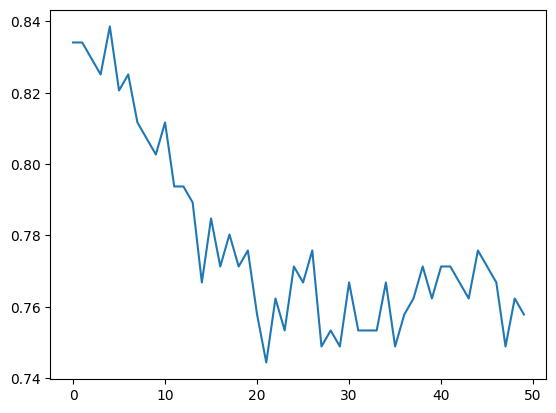

In [40]:
sns.lineplot(x=range(len(score_list)), y=score_list)

In [42]:
score_list.index(max(score_list))

4

In [43]:
max_depth = 5

In [45]:
model = DecisionTreeClassifier(max_depth=max_depth)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [46]:
accuracy_score(y_test, pred)

0.8385650224215246

In [47]:
from sklearn.tree import plot_tree

[Text(0.48660714285714285, 0.9166666666666666, 'BuyItNow <= 0.5\ngini = 0.497\nsamples = 1262\nvalue = [680, 582]'),
 Text(0.25892857142857145, 0.75, 'startprice <= 243.425\ngini = 0.353\nsamples = 698\nvalue = [538, 160]'),
 Text(0.14285714285714285, 0.5833333333333334, 'productline_Galaxy_S9 <= 0.5\ngini = 0.422\nsamples = 297\nvalue = [207, 90]'),
 Text(0.07142857142857142, 0.4166666666666667, 'carrier_Unknown <= 0.5\ngini = 0.403\nsamples = 282\nvalue = [203, 79]'),
 Text(0.03571428571428571, 0.25, 'color_White <= 0.5\ngini = 0.495\nsamples = 49\nvalue = [27, 22]'),
 Text(0.017857142857142856, 0.08333333333333333, 'gini = 0.478\nsamples = 33\nvalue = [13, 20]'),
 Text(0.05357142857142857, 0.08333333333333333, 'gini = 0.219\nsamples = 16\nvalue = [14, 2]'),
 Text(0.10714285714285714, 0.25, 'charCountDescription <= 97.5\ngini = 0.37\nsamples = 233\nvalue = [176, 57]'),
 Text(0.08928571428571429, 0.08333333333333333, 'gini = 0.398\nsamples = 197\nvalue = [143, 54]'),
 Text(0.125, 0.08

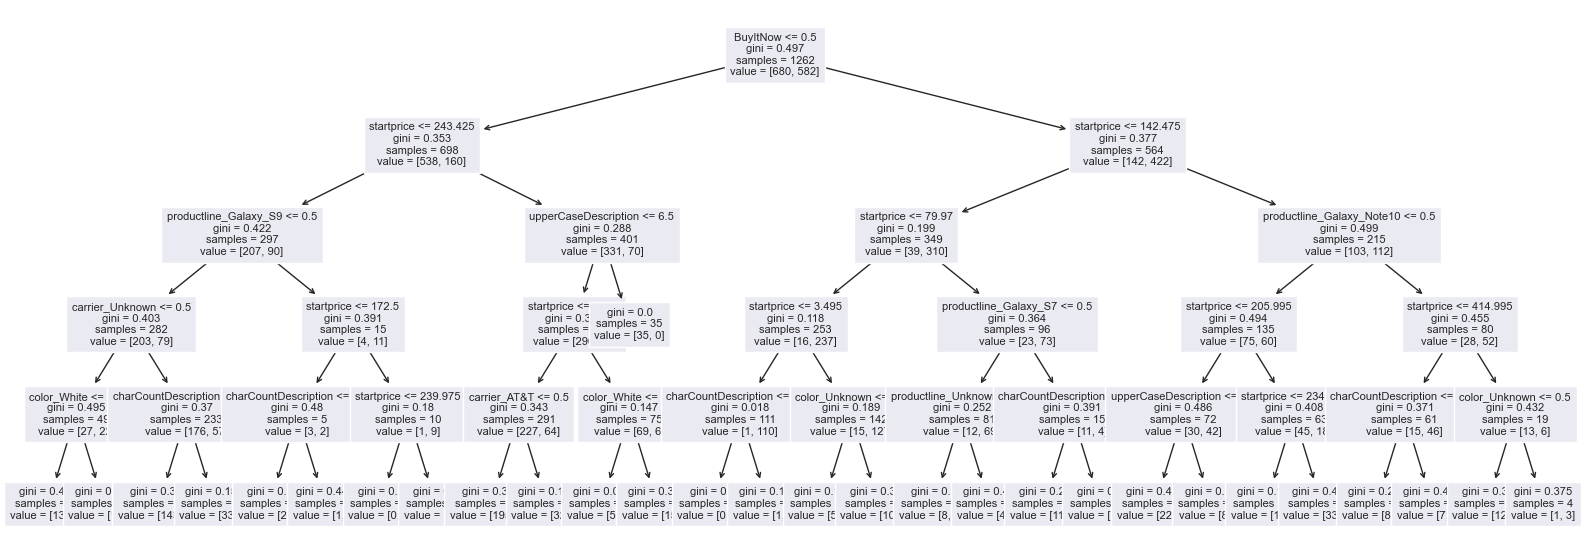

In [63]:
plt.figure(figsize=(20,7))
plot_tree(model, fontsize=8, feature_names=X_train.columns, max_depth=5)

In [ ]:
# 정형데이터 예측의 끝판왕 3대장(트리 기반 앙상블 모델)

# 1. catboost

# 2. lightgbm

# 3. XGBoost

In [58]:
%pip install lightgbm

                                              0.0/1.0 MB ? eta -:--:--
     -----------------                        0.5/1.0 MB 14.2 MB/s eta 0:00:01
     ------------------------------------     0.9/1.0 MB 11.8 MB/s eta 0:00:01
     ---------------------------------------- 1.0/1.0 MB 10.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [59]:
import lightgbm

In [ ]:
lightgbm.LGBMClassifier()